In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3


df = pd.read_csv(r'C:\Users\Christos\Desktop\Data Analysis project\Car_data\CarsData.csv')
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford
...,...,...,...,...,...,...,...,...,...,...
97707,Fiesta,2017,10447,Automatic,8337,Petrol,145,54.3,1.0,ford
97708,3 Series,2014,14995,Manual,25372,Diesel,30,61.4,2.0,BMW
97709,Fiesta,2017,8950,Manual,19910,Petrol,125,54.3,1.2,ford
97710,Astra,2017,10700,Automatic,24468,Petrol,125,50.4,1.4,vauxhall


In [9]:
#print first rows
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford


In [10]:
#Checking our data
df.describe

<bound method NDFrame.describe of                model  year  price transmission  mileage fuelType  tax   mpg  \
0                I10  2017   7495       Manual    11630   Petrol  145  60.1   
1               Polo  2017  10989       Manual     9200   Petrol  145  58.9   
2           2 Series  2019  27990    Semi-Auto     1614   Diesel  145  49.6   
3       Yeti Outdoor  2017  12495       Manual    30960   Diesel  150  62.8   
4             Fiesta  2017   7999       Manual    19353   Petrol  125  54.3   
...              ...   ...    ...          ...      ...      ...  ...   ...   
97707         Fiesta  2017  10447    Automatic     8337   Petrol  145  54.3   
97708       3 Series  2014  14995       Manual    25372   Diesel   30  61.4   
97709         Fiesta  2017   8950       Manual    19910   Petrol  125  54.3   
97710          Astra  2017  10700    Automatic    24468   Petrol  125  50.4   
97711    Grandland X  2019  15798       Manual    10586   Diesel  150  48.7   

       engineSize

In [13]:
print(df.columns)

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'Manufacturer'],
      dtype='object')


In [15]:
vintage_cars = df[df['year'] <= 1999]
print(vintage_cars)

               model  year  price transmission  mileage fuelType  tax   mpg  \
785              SLK  1998   1990    Automatic    99300   Petrol  265  32.1   
3475              A3  1998   4999    Automatic    55000   Petrol  265  30.4   
4410    Land Cruiser  1998  19990       Manual   100000   Diesel  265  23.9   
15557             A8  1997   4650    Automatic   122000   Petrol  265  18.9   
20972       SL CLASS  1997   9995    Automatic    76000   Petrol  255  28.2   
22144       3 Series  1999   1200    Automatic    82000   Petrol  245  31.0   
22528             Z3  1999   3995       Manual    74282   Petrol  245  35.3   
33386         Escort  1996   3000       Manual    50000   Petrol  265  34.4   
35832             Z3  1998   3950       Manual    56500   Petrol  270  35.3   
37845             Z3  1999   3995       Manual    51949   Petrol  255  35.3   
39632             Z3  1997   3950       Manual    49000   Petrol  270  35.3   
61962       5 Series  1996   5995    Automatic    36

In [17]:
#Summary of metrics
summary_metrics = df.agg({
    'price': ['mean', 'min', 'max'],
    'mileage': 'mean',
    'mpg': 'mean',
    'engineSize': 'mean',
    'year': 'mean'
}).round()
summary_metrics['price'] = summary_metrics['price'].round()  # Ensure the prices are rounded
print(summary_metrics)

         price  mileage   mpg  engineSize    year
mean   16773.0  23219.0  55.0         2.0  2017.0
min      450.0      NaN   NaN         NaN     NaN
max   159999.0      NaN   NaN         NaN     NaN


In [18]:
avg_price_over_years = df.groupby('year')['price'].mean().round().reset_index()
print(avg_price_over_years)

    year    price
0   1970  17747.0
1   1996   4498.0
2   1997   4886.0
3   1998   8257.0
4   1999   3522.0
5   2000   3163.0
6   2001   4150.0
7   2002   3579.0
8   2003   3658.0
9   2004   4524.0
10  2005   3017.0
11  2006   3714.0
12  2007   3706.0
13  2008   4003.0
14  2009   4320.0
15  2010   5286.0
16  2011   6830.0
17  2012   7587.0
18  2013   8599.0
19  2014   9964.0
20  2015  11669.0
21  2016  13292.0
22  2017  14371.0
23  2018  16243.0
24  2019  23570.0
25  2020  29108.0
26  2024   6495.0


In [24]:
count_models_per_manufacturer = df.groupby(['Manufacturer', 'model']).size().reset_index(name='Count_Model_Manufacturer').sort_values(by='model', ascending=True)
print(count_models_per_manufacturer)

    Manufacturer      model  Count_Model_Manufacturer
26           BMW   1 Series                      1962
27           BMW   2 Series                      1188
28           BMW   3 Series                      2434
29           BMW   4 Series                       986
30           BMW   5 Series                      1051
..           ...        ...                       ...
112         merc        180                         1
113         merc        200                         1
114         merc        220                         1
115         merc        230                         1
116         merc    E Class                         1

[196 rows x 3 columns]


In [22]:
car_count_per_manufacturer = df.groupby('Manufacturer').size().reset_index(name='Car_Count_Manufacturer').sort_values(by='Car_Count_Manufacturer', ascending=False)
print(car_count_per_manufacturer)

  Manufacturer  Car_Count_Manufacturer
2         ford                   17811
8   volkswagen                   14893
7     vauxhall                   13258
4         merc                   12860
1          BMW                   10664
0         Audi                   10565
6       toyota                    6699
5        skoda                    6188
3       hyundi                    4774


In [21]:
avg_by_manufacturer = df.groupby('Manufacturer').agg({
    'price': 'mean',
    'mpg': 'mean',
    'engineSize': 'mean'
}).round().reset_index().sort_values(by='price', ascending=False)
print(avg_by_manufacturer)

  Manufacturer    price   mpg  engineSize
4         merc  24636.0  55.0         2.0
0         Audi  22854.0  51.0         2.0
1          BMW  22693.0  56.0         2.0
8   volkswagen  16808.0  54.0         2.0
5        skoda  14285.0  57.0         1.0
3       hyundi  12728.0  54.0         1.0
6       toyota  12530.0  63.0         1.0
2         ford  12270.0  58.0         1.0
7     vauxhall  10314.0  52.0         1.0


In [25]:
transmission_counts = df.groupby('transmission').size().reset_index(name='TransmissionCounts').sort_values(by='TransmissionCounts', ascending=False)
print(transmission_counts)

  transmission  TransmissionCounts
1       Manual               55502
3    Semi-Auto               22296
0    Automatic               19905
2        Other                   9


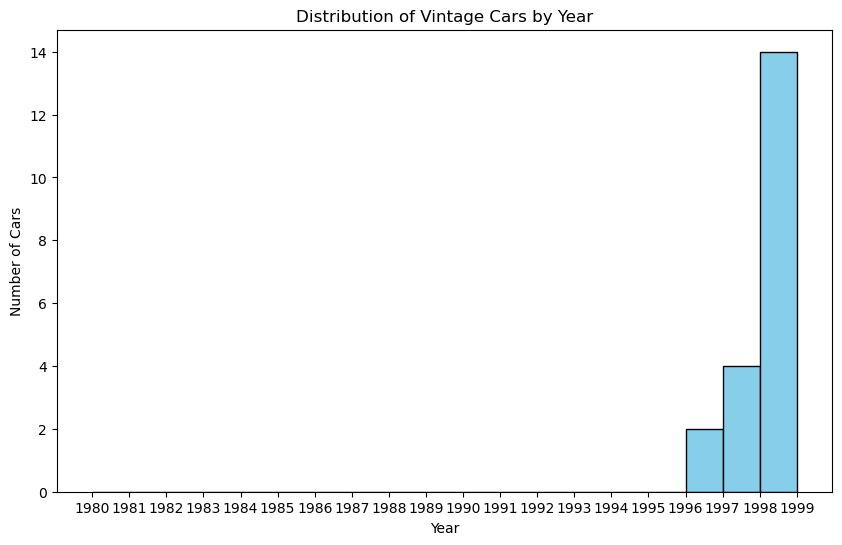

In [27]:
#Vintage cars by year
plt.figure(figsize=(10, 6))
plt.hist(vintage_cars['year'], bins=range(1980, 2000), color='skyblue', edgecolor='black')
plt.title('Distribution of Vintage Cars by Year')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.xticks(range(1980, 2000))
plt.show()


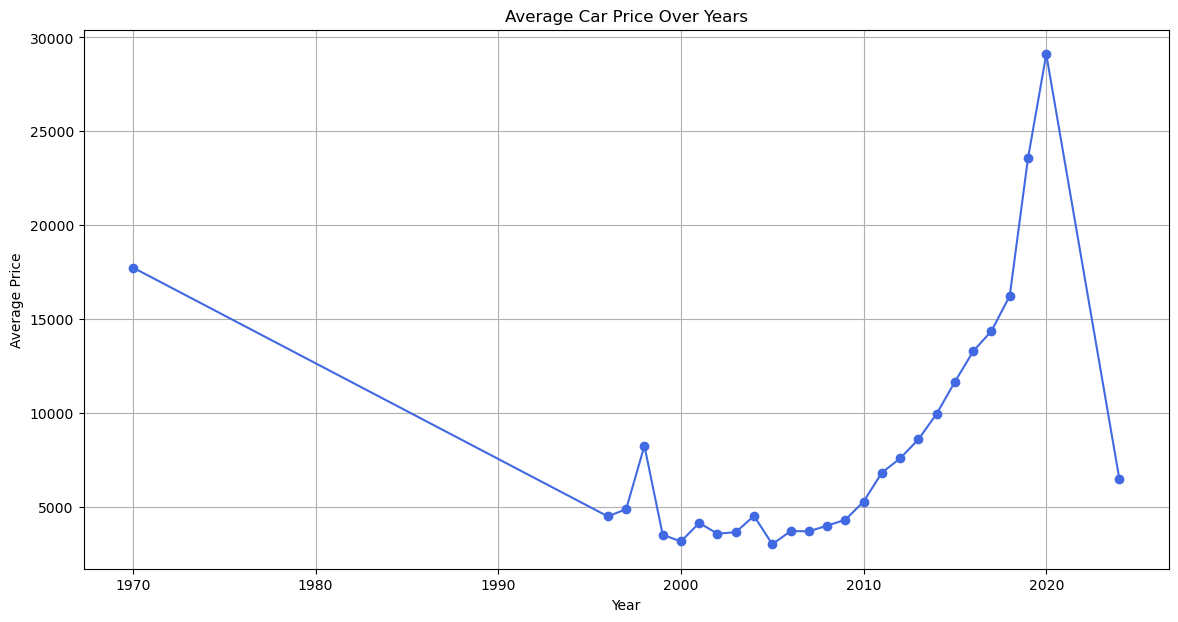

In [28]:
#Average car prices over years.
plt.figure(figsize=(14, 7))
plt.plot(avg_price_over_years['year'], avg_price_over_years['price'], marker='o', linestyle='-', color='royalblue')
plt.title('Average Car Price Over Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

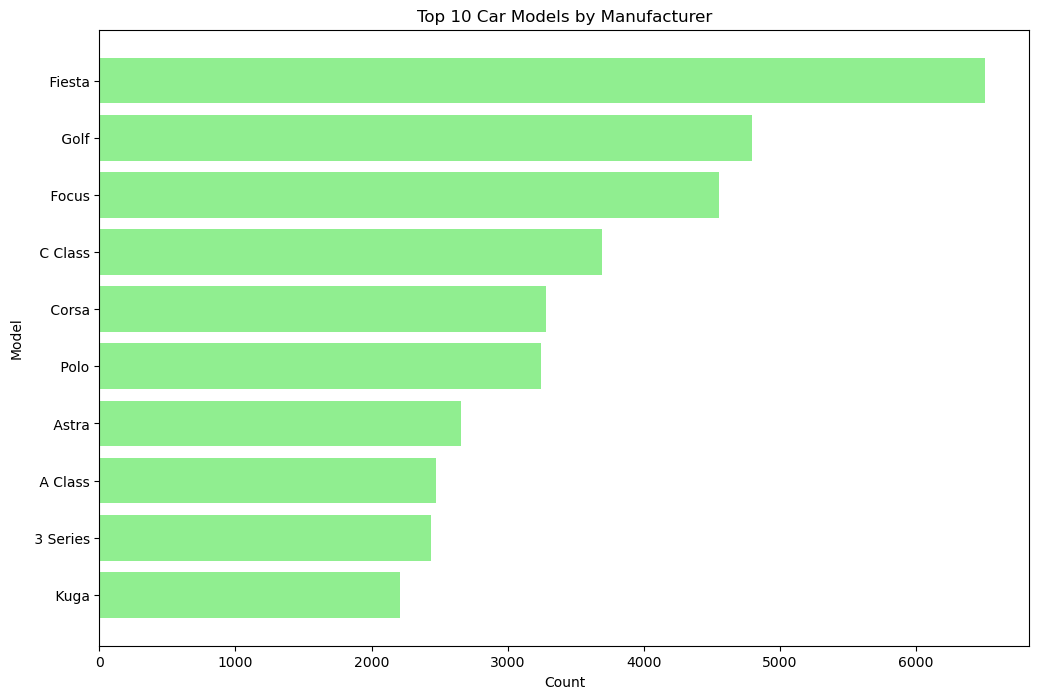

In [29]:
#Top 10 car models by manufacturer
top_n = count_models_per_manufacturer.sort_values(by='Count_Model_Manufacturer', ascending=False).head(10)
plt.figure(figsize=(12, 8))
plt.barh(top_n['model'], top_n['Count_Model_Manufacturer'], color='lightgreen')
plt.xlabel('Count')
plt.ylabel('Model')
plt.title('Top 10 Car Models by Manufacturer')
plt.gca().invert_yaxis()  # To display the bar with the highest count at the top
plt.show()

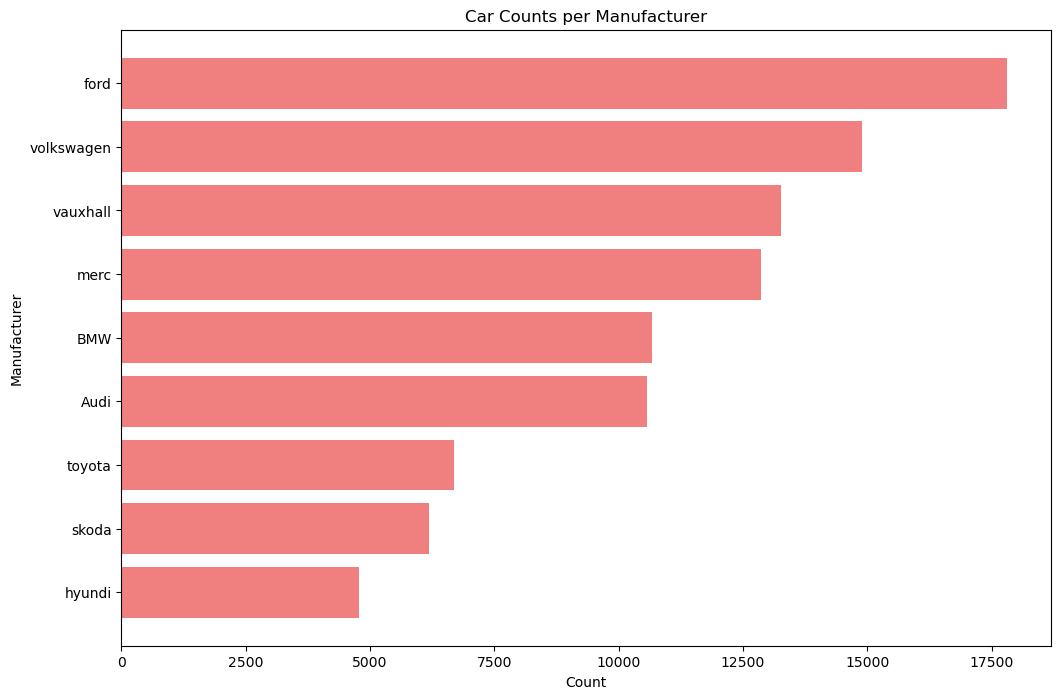

In [30]:
#Car counts per manufaturer
plt.figure(figsize=(12, 8))
plt.barh(car_count_per_manufacturer['Manufacturer'], car_count_per_manufacturer['Car_Count_Manufacturer'], color='lightcoral')
plt.xlabel('Count')
plt.ylabel('Manufacturer')
plt.title('Car Counts per Manufacturer')
plt.gca().invert_yaxis()  # To display the bar with the highest count at the top
plt.show()

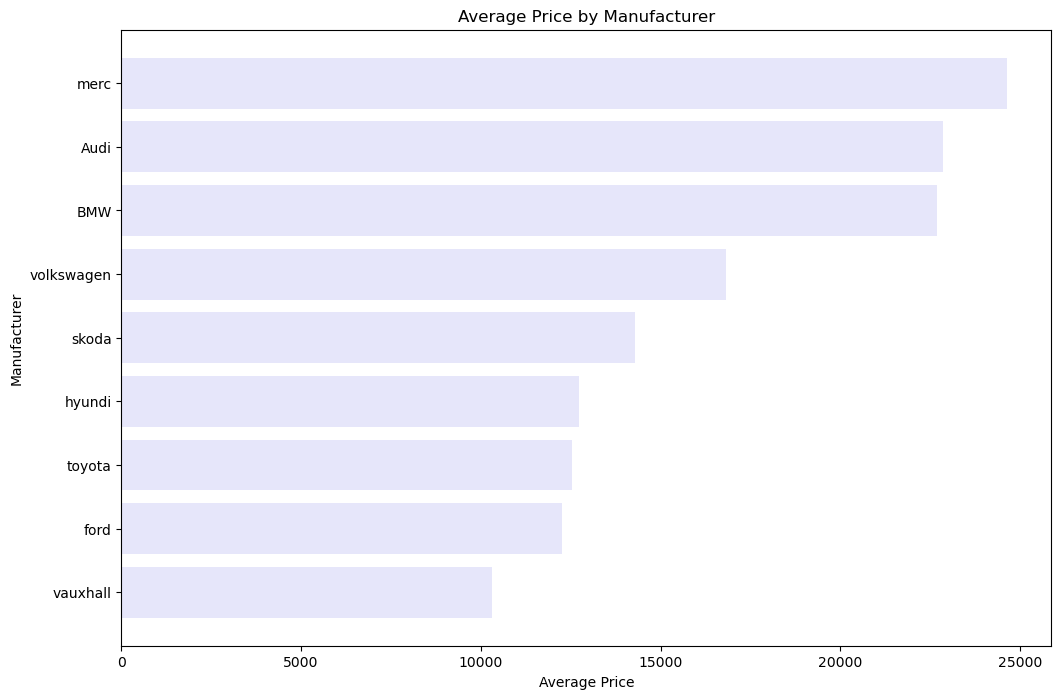

In [31]:
#Average Price by manufacturer
avg_price_sorted = avg_by_manufacturer.sort_values(by='price', ascending=False)
plt.figure(figsize=(12, 8))
plt.barh(avg_price_sorted['Manufacturer'], avg_price_sorted['price'], color='lavender')
plt.xlabel('Average Price')
plt.ylabel('Manufacturer')
plt.title('Average Price by Manufacturer')
plt.gca().invert_yaxis()
plt.show()

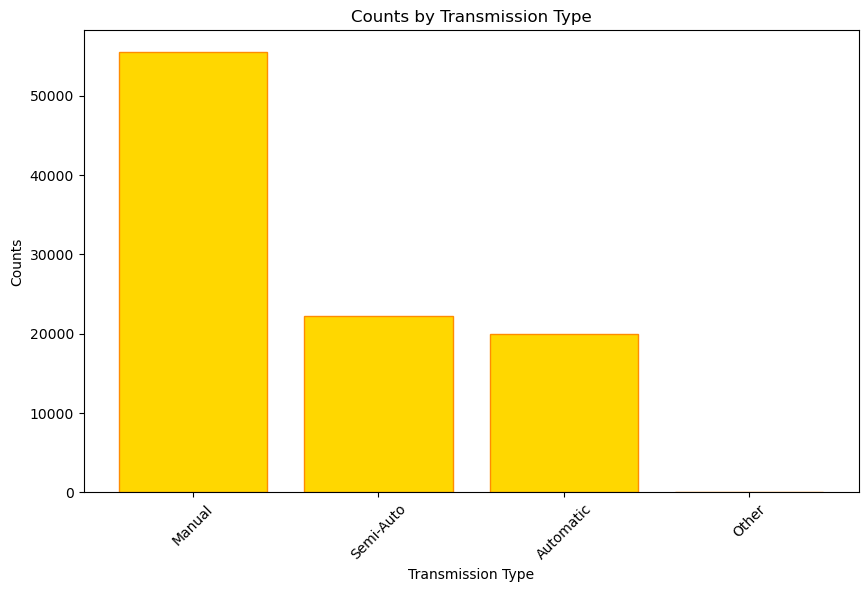

In [32]:
#Counts by Transmission Type
plt.figure(figsize=(10, 6))
plt.bar(transmission_counts['transmission'], transmission_counts['TransmissionCounts'], color='gold', edgecolor='darkorange')
plt.title('Counts by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()